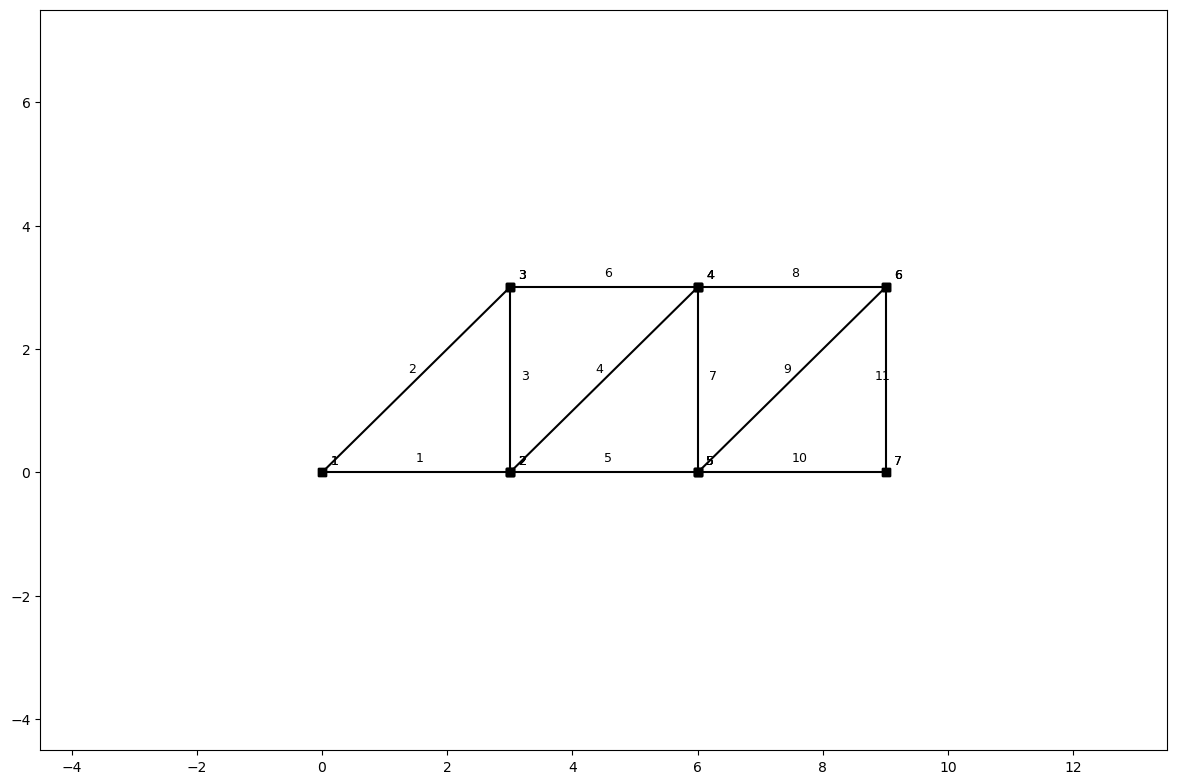

In [1]:
#lets import the systemElemnts from the anastruct library
from anastruct import SystemElements
#instatiate the SystemElement object
ss = SystemElements()

#lets add truss members at node using add_truss_element method and passing coordinate loaction as argument to 
#define length of each member
ss.add_truss_element(location=[[0, 0], [3, 0]])
ss.add_truss_element(location=[[0, 0], [3, 3]])
ss.add_truss_element(location=[[3, 3], [3, 0]]) 
ss.add_truss_element(location=[[3, 0], [6, 3]])
ss.add_truss_element(location=[[3, 0], [6, 0]])
ss.add_truss_element(location=[[3, 3], [6, 3]])
ss.add_truss_element(location=[[6, 3], [6, 0]])
ss.add_truss_element(location=[[6, 3], [9, 3]])
ss.add_truss_element(location=[[6, 0], [9, 3]])
ss.add_truss_element(location=[[6, 0], [9, 0]])
ss.add_truss_element(location=[[9, 0], [9, 3]])

#this method plot our assemble structure
ss.show_structure()

In [2]:
# Add support condition
#the add_support_hinged function is used to specify hinge support
#the node_id argument is the nodal position at which the  support is placed which is an interger
ss.add_support_hinged(node_id=1) 
#the add_support_roll method is used to specify roller support
ss.add_support_roll(node_id=7)

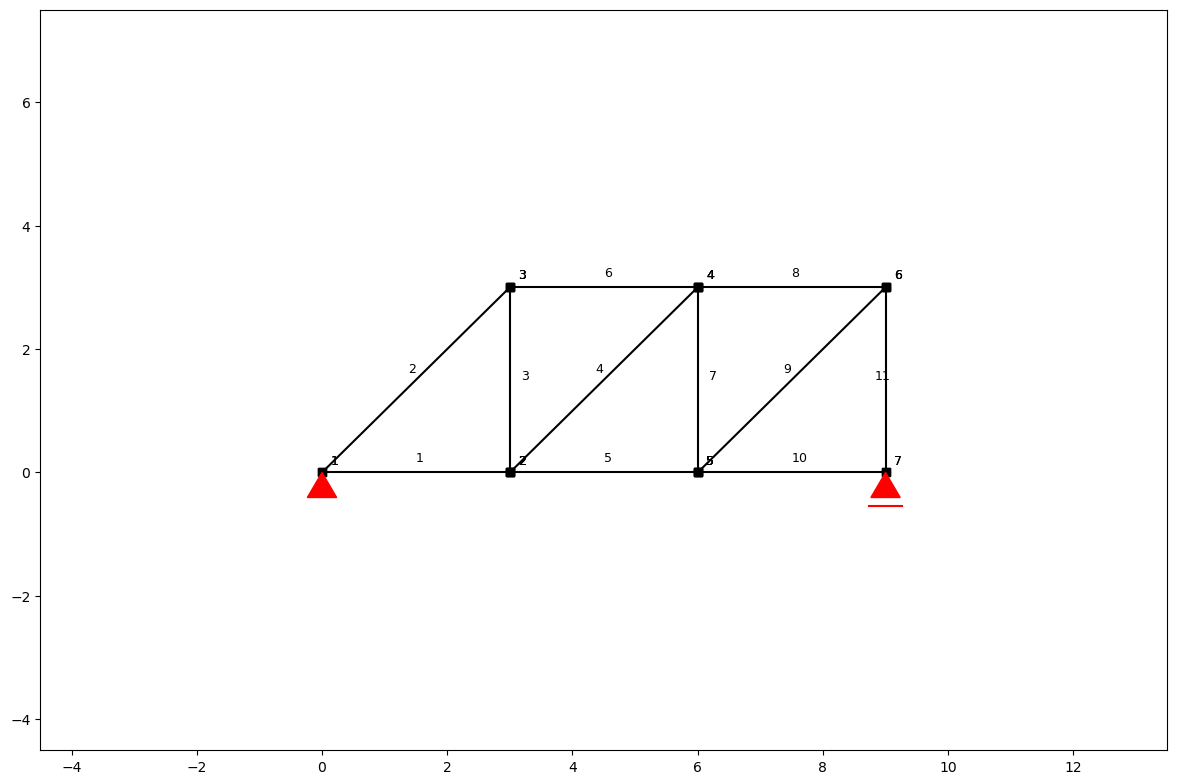

In [3]:
ss.show_structure()

In [4]:
# Add loadings
#the point_load method indicate it is a point load 
#the argument fy indicate it is a vertical force and negative sign indicate downard acting at node 4
ss.point_load(Fy=-6, node_id=3) 
#acting at node 4
ss.point_load(Fy=-4, node_id=4)
#Fx is a horizontal force acting in the positive direction at node 6
ss.point_load(Fx=+10, node_id=6)

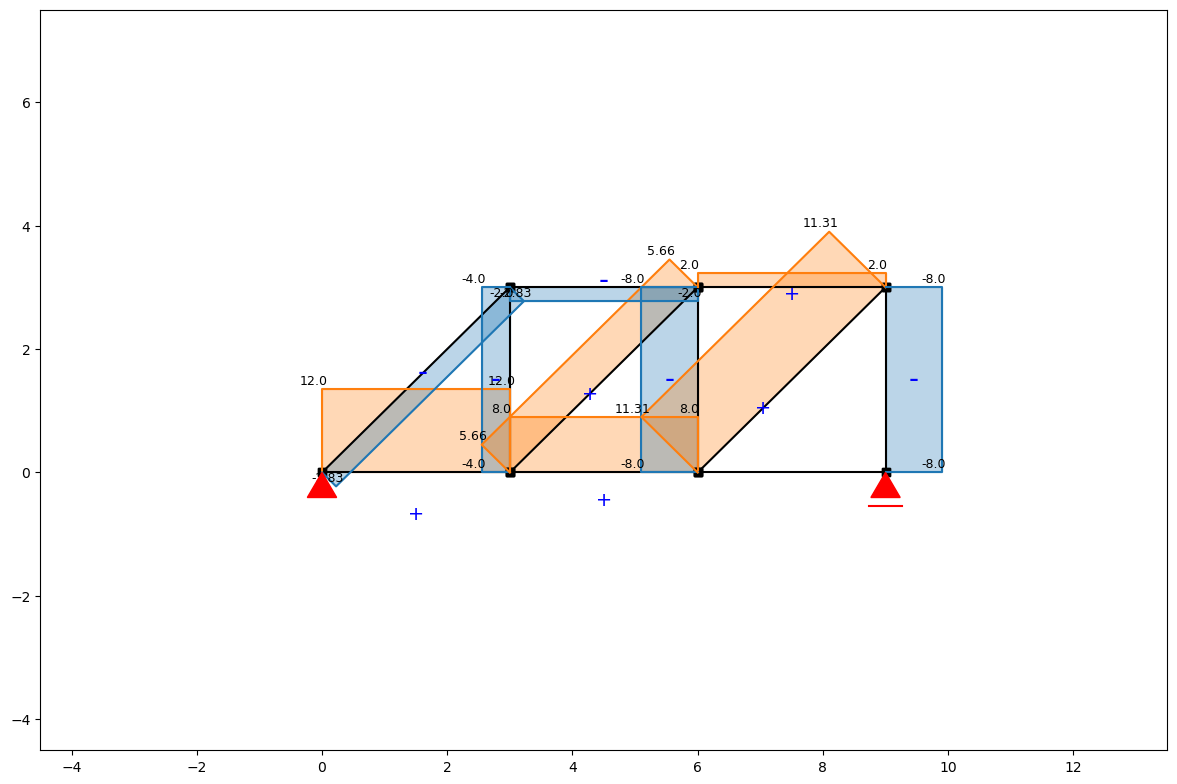

In [5]:
#this method compute all the reaction forces and axial forces in the model
ss.solve()
#this method plot the computed axial forces of the truss elements or members  
ss.show_axial_force()

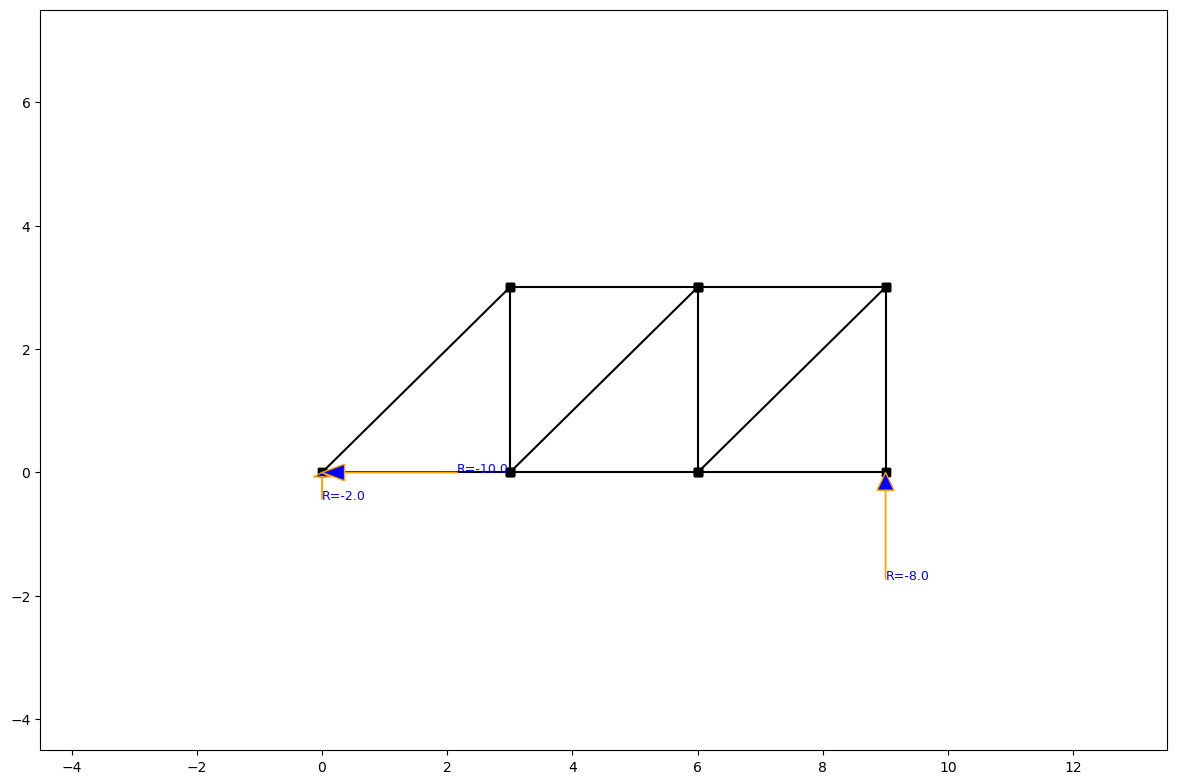

In [6]:
#this method plot the computed reaction forces at the support
ss.show_reaction_force()

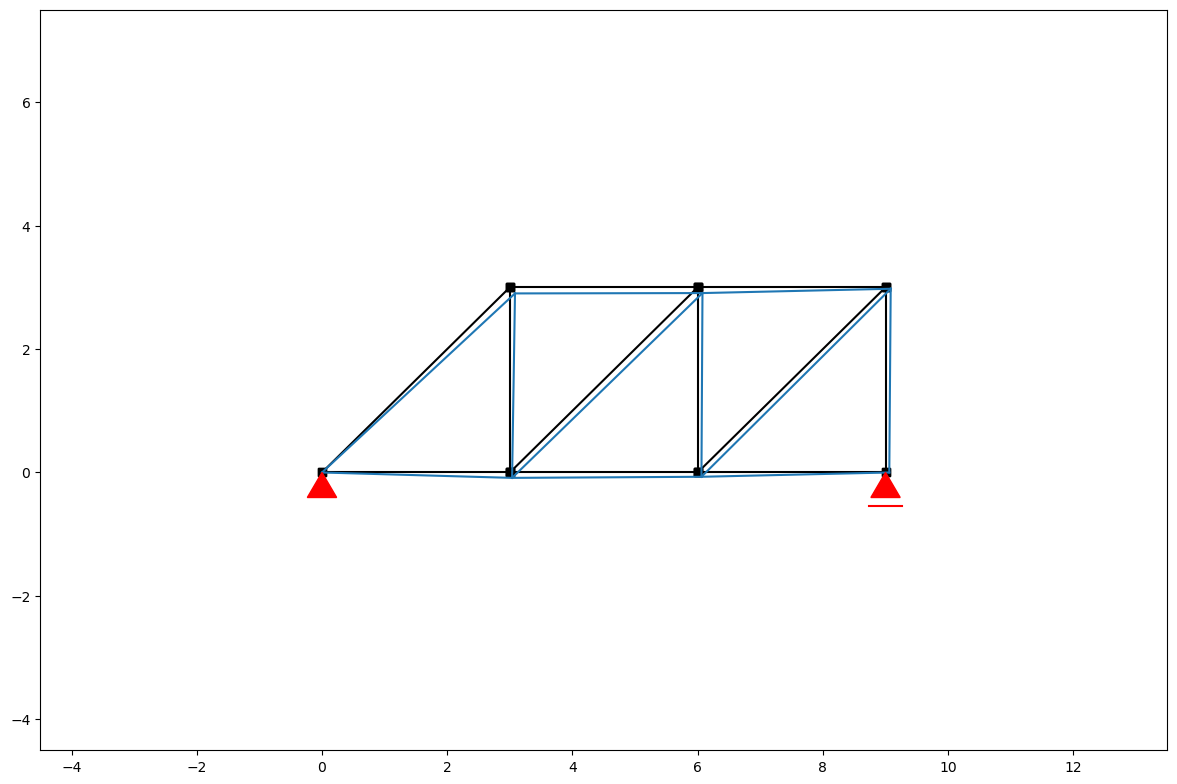

In [7]:
#this method plot the computed displacement of the entire model.
ss.show_displacement(factor=15)

In [8]:
#this method store our calculation result of our elements or members in list of dictionary
list_ext=ss.get_element_results(element_id=0)

In [13]:
from pandas import *
df= DataFrame(list_ext)
df.drop(['alpha', 'u'], axis = 1, inplace = True)
df.rename(columns={'length': 'L(m)',
                   'N': 'N(kN)',
                   'id':'Members'},
          inplace=True, errors='raise')

In [14]:
ss.get_element_results

,Members,L(m),umax,umin,wtotmax,wtotmin,wtot,Nmin,Nmax,N(kN)
0,1,3.00000,0.001913,0.001014,0.000000,0.005817,None,12.000000,12.000000,None
1,2,4.24264,-0.000478,-0.000902,0.000000,0.008558,None,-2.828427,-2.828427,None
2,3,3.00000,-0.000338,-0.000638,-0.005486,-0.002400,None,-4.000000,-4.000000,None
3,4,4.24264,0.001804,0.000956,0.005810,0.008008,None,5.656854,5.656854,None
4,5,3.00000,0.001275,0.000676,0.004640,0.005817,None,8.000000,8.000000,None
5,6,3.00000,-0.000169,-0.000319,0.006240,0.006617,None,-2.000000,-2.000000,None
6,7,3.00000,-0.000676,-0.001275,-0.005086,-0.004000,None,-8.000000,-8.000000,None
7,8,3.00000,0.000319,0.000169,0.001600,0.006240,None,2.000000,2.000000,None
8,9,4.24264,0.003608,0.001911,0.005010,0.006109,None,11.313708,11.313708,None
9,10,3.00000,0.000000,0.000000,0.000000,0.004640,None,0.000000,0.000000,None
